<a href="https://colab.research.google.com/github/JomavisTec/ClaseIA/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.callbacks import TensorBoard

In [2]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
data, metadata = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteE02WIG/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


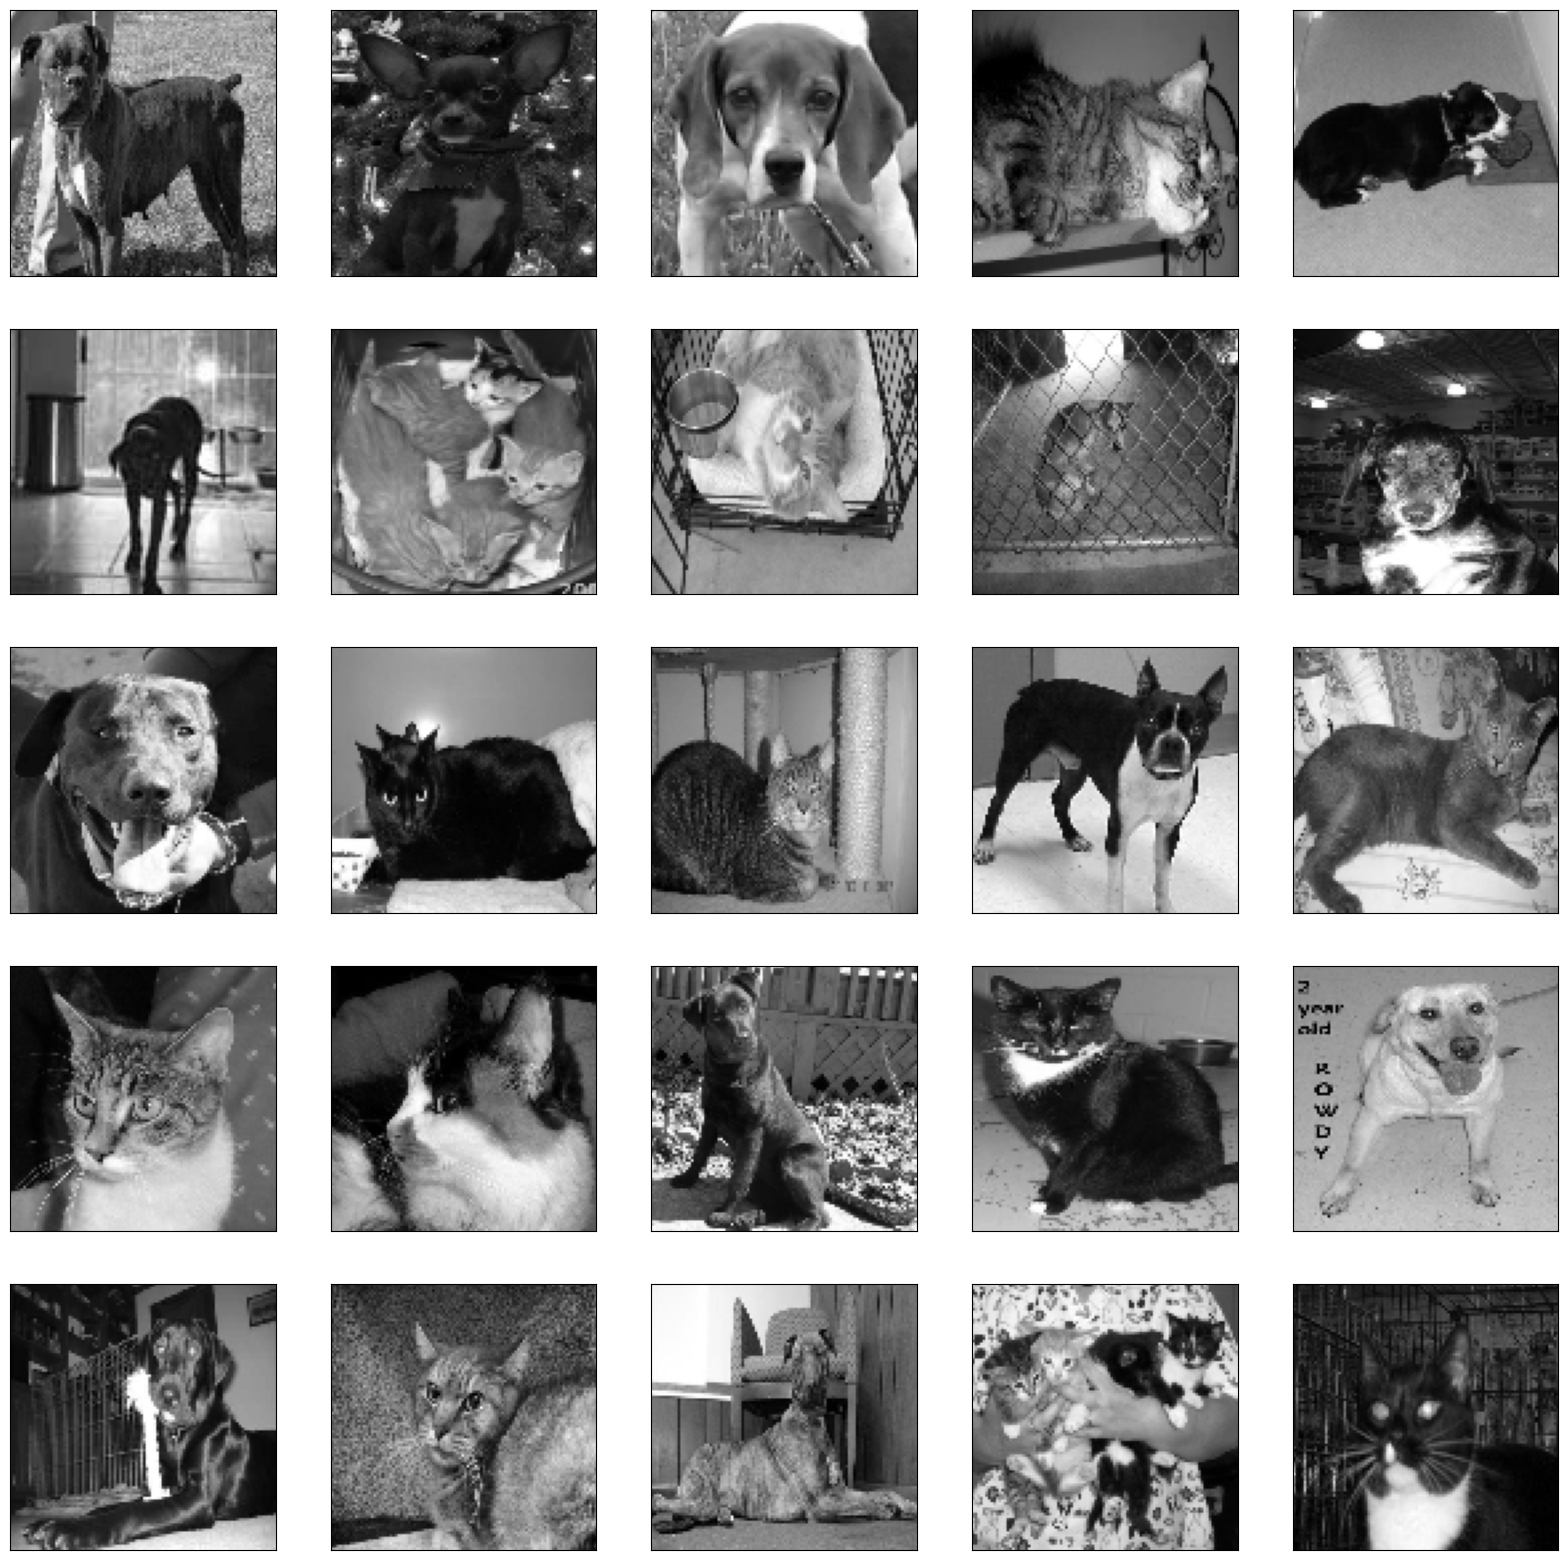

In [3]:
plt.figure(figsize=(20,20))

SIZE_IMG = 100

for i, (image, label) in enumerate(data['train'].take(25)):
  image = cv2.resize(image.numpy(), (SIZE_IMG, SIZE_IMG))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = 'gray')

In [4]:
training_data = []
for i, (image, label) in enumerate(data['train']):
  image = cv2.resize(image.numpy(), (SIZE_IMG, SIZE_IMG))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.reshape(SIZE_IMG, SIZE_IMG, 1)
  training_data.append([image, label])

In [5]:
X = []
y = []

for image, label in training_data:
  X.append(image)
  y.append(label)

X = np.array(X).astype(float) / 255
y = np.array(y)
X.shape

(23262, 100, 100, 1)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (100, 100, 1)),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [7]:
model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [8]:
tensorboard = TensorBoard(log_dir='logs/denso')
model.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=10,
                callbacks=[tensorboard])

Epoch 1/10
618/618 [==============================] - 16s 24ms/step - loss: 0.7137 - accuracy: 0.5423 - val_loss: 0.6842 - val_accuracy: 0.5590
Epoch 2/10
618/618 [==============================] - 14s 23ms/step - loss: 0.6808 - accuracy: 0.5737 - val_loss: 0.6788 - val_accuracy: 0.5751
Epoch 3/10
618/618 [==============================] - 15s 24ms/step - loss: 0.6798 - accuracy: 0.5650 - val_loss: 0.6774 - val_accuracy: 0.5662
Epoch 4/10
618/618 [==============================] - 16s 25ms/step - loss: 0.6798 - accuracy: 0.5613 - val_loss: 0.6801 - val_accuracy: 0.5639
Epoch 5/10
618/618 [==============================] - 15s 24ms/step - loss: 0.6792 - accuracy: 0.5634 - val_loss: 0.6769 - val_accuracy: 0.5656
Epoch 6/10
618/618 [==============================] - 15s 24ms/step - loss: 0.6767 - accuracy: 0.5739 - val_loss: 0.6810 - val_accuracy: 0.5679
Epoch 7/10
618/618 [==============================] - 14s 23ms/step - loss: 0.6753 - accuracy: 0.5752 - val_loss: 0.6775 - val_accuracy: